In [2]:
import pysal as ps
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from libpysal.weights.contiguity import Queen
import libpysal
sns.set_style('white')


In [3]:
from libpysal.examples import load_example
elections = load_example('Elections')

In [4]:
elections.get_file_list()

['C:\\Users\\mammo\\pysal_data\\Elections\\election\\election.dbf',
 'C:\\Users\\mammo\\pysal_data\\Elections\\election\\election.prj',
 'C:\\Users\\mammo\\pysal_data\\Elections\\election\\election.shp',
 'C:\\Users\\mammo\\pysal_data\\Elections\\election\\election.shx',
 'C:\\Users\\mammo\\pysal_data\\Elections\\__MACOSX\\election\\._election.shp']

In [5]:
#geoms = gpd.read_file(ps.examples.get_path('NAT.shp'))

<AxesSubplot:>

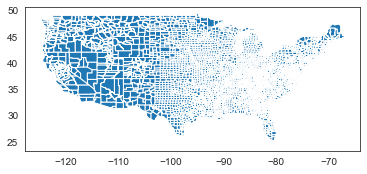

In [6]:
votes = gpd.read_file(elections.get_path('election.shp'))
%matplotlib inline
votes.plot()

In [7]:
votes.head()

STATEFP COUNTYFP  GEOID         ALAND      AWATER       area_name  \
0      01      005  01005  2.291821e+09  50864677.0  Barbour County   
1      01      023  01023  2.365955e+09  19059247.0  Choctaw County   
2      01      035  01035  2.201896e+09   6643480.0  Conecuh County   
3      01      051  01051  1.601877e+09  99850740.0   Elmore County   
4      01      065  01065  1.667805e+09  32525874.0     Hale County   

  state_abbr  PST045214  PST040210  PST120214  ...  total_2012  Demvotes12  \
0         AL    26887.0    27457.0       -2.1  ...     11459.0      5873.0   
1         AL    13323.0    13858.0       -3.9  ...      7965.0      3785.0   
2         AL    12670.0    13228.0       -4.2  ...      7013.0      3551.0   
3         AL    80977.0    79296.0        2.1  ...     35440.0      8940.0   
4         AL    15184.0    15760.0       -3.7  ...      8628.0      5401.0   

   GOPvotes12  county_fip  state_fips  pct_dem_12  pct_gop_12  diff_2012  \
0      5539.0         5.0         1.0    0.512523    0.483376      334.0   
1      4150.0        23.0         1.0    0.475204    0.521030      365.0   
2      3434.0        35.0         1.0    0.506345    0.489662      117.0   
3     26223.0        51.0         1.0    0.252257    0.739927    17283.0   
4      3205.0        65.0         1.0    0.625985    0.371465     2196.0   

   pct_pt_12                                           geometry  
0   0.029147  POLYGON ((-85.74803 31.61918, -85.74544 31.618...  
1  -0.045825  POLYGON ((-88.47323 31.89386, -88.46888 31.930...  
2   0.016683  POLYGON ((-87.42720 31.26436, -87.42551 31.268...  
3  -0.487669  POLYGON ((-86.41333 32.75059, -86.37115 32.750...  
4   0.254520  POLYGON ((-87.87046 32.76244, -87.86818 32.765...  

[5 rows x 75 columns]

In [8]:
print(votes['pct_dem_12'].mean())
print(votes['pct_dem_16'].mean())

0.384501897042472
0.3166674300444024


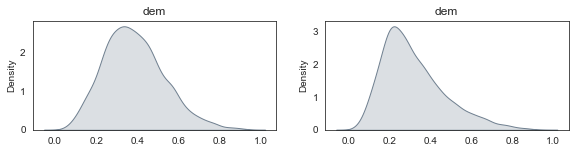

In [9]:
f,ax = plt.subplots(1,2, figsize=(2*3*1.6, 2))
for i,col in enumerate(['pct_dem_12','pct_dem_16']):
    sns.kdeplot(votes[col].values, shade=True, color='slategrey', ax=ax[i])
    ax[i].set_title(col.split('_')[1])

In [10]:
votes.crs = {'init':'epsg:4326'}
votes = votes.to_crs(epsg='5070')

C:\Users\mammo\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


C:\Users\mammo\anaconda3\lib\site-packages\seaborn\distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
C:\Users\mammo\anaconda3\lib\site-packages\seaborn\distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


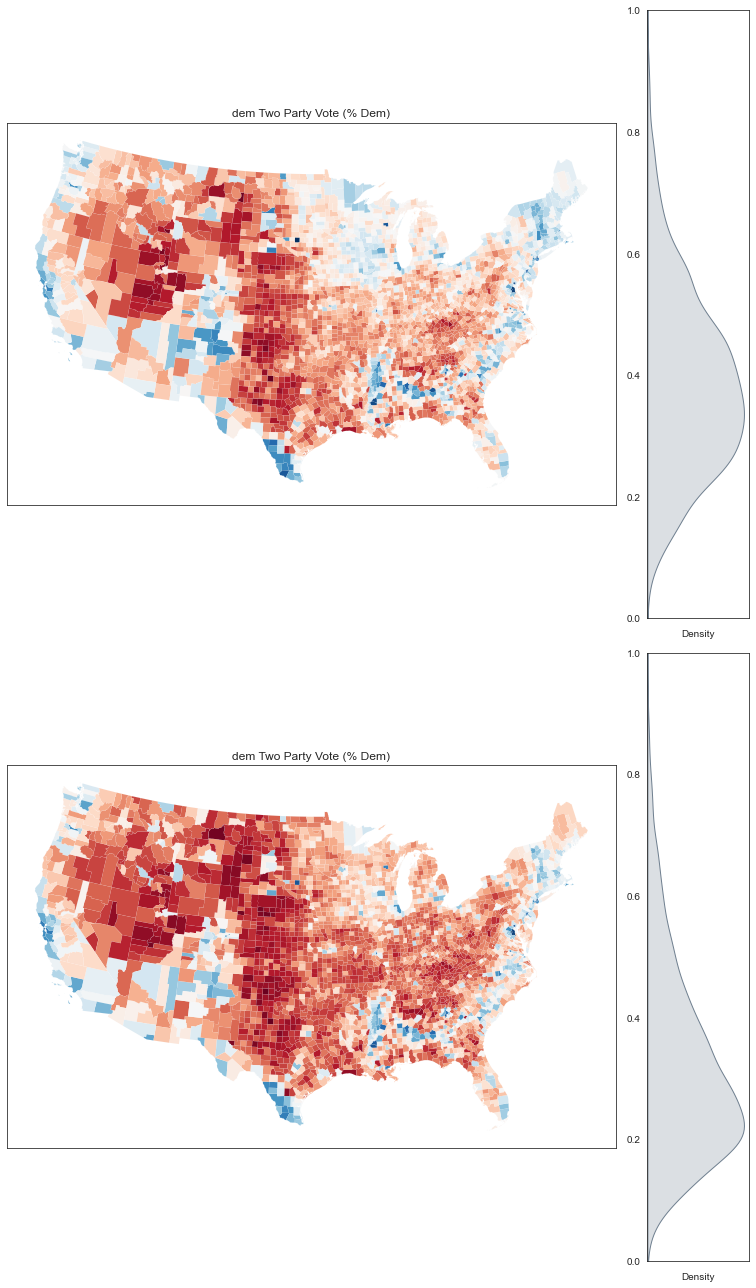

In [11]:
f,ax = plt.subplots(2,2, figsize=(1.6*6 + 1,6*3), gridspec_kw=dict(width_ratios=(6,1)))
for i,col in enumerate(['pct_dem_12','pct_dem_16']):
    votes.plot(col, linewidth=.05, cmap='RdBu', ax=ax[i,0])
    ax[i,0].set_title(col.split('_')[1] + ' Two Party Vote (% Dem)')
    ax[i,0].set_xticklabels('')
    ax[i,0].set_yticklabels('')
    sns.kdeplot(votes[col].values, ax=ax[i,1], vertical=True, shade=True, color='slategrey')
    ax[i,1].set_xticklabels('')
    ax[i,1].set_ylim(0,1)
f.tight_layout()
plt.show()

In [12]:
votes.dropna(subset=['pct_dem_12','pct_dem_16'], inplace=True)

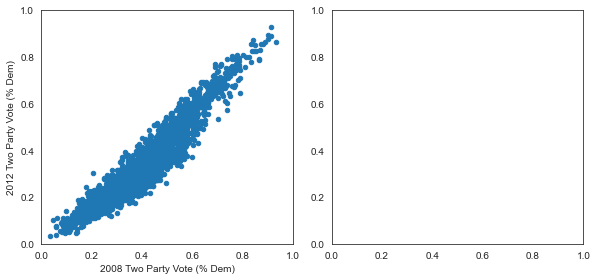

In [13]:
f,ax = plt.subplots(1,2, figsize=(4*2.1,4))
votes[['pct_dem_12','pct_dem_16']].plot.scatter('pct_dem_12','pct_dem_16', ax=ax[0])
ax[0].set_xlabel('2008 Two Party Vote (% Dem)')
ax[0].set_ylabel('2012 Two Party Vote (% Dem)')
ax[0].axis([0,1,0,1])
r = np.corrcoef(votes['pct_dem_12'].values, votes['pct_dem_16'].values)[0,1]

f.tight_layout()
plt.show()

In [14]:
from splot.libpysal import plot_spatial_weights
w = Queen.from_dataframe(votes)
plot_spatial_weights(weights, votes)
plt.show()

C:\Users\mammo\anaconda3\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There are 3 islands with ids: 1267, 2729, 2763.
  warnings.warn(message)


NameError: name 'weights' is not defined

In [15]:
from splot.esda import moran_scatterplot
from splot.esda import plot_moran


# calculate Moran and plot
moran = Moran(votes['pct_dem_16'], w=W)
plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()
ax.set_xlabel('pct_dem_16')
ax.set_ylabel('Spatial Lag of pct_dem_16')
plt.show()

NameError: name 'Moran' is not defined

In [16]:
?moran

Object `moran` not found.


## TASK: How can we isolate a p-value to validate whether our assumption of normality is true?